# Лабораторная работа 3: Ансамбли
## Использование деревьев для обнаружения деревьев 

Мы будем использовать методы ансамбля на основе деревьев в наборе данных [Covertype](https://www.openml.org/d/180).
Он содержит около 100 000 наблюдений за 7 типами деревьев (ель, сосна, тополь, осина, ...), описанных по 55 признакам, описывающим высоту, расстояние до воды, тип почвы и т.д.

In [4]:
!pip install openml
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
import seaborn as sns

In [20]:
# Download Covertype data. Takes a while the first time.
covertype = oml.datasets.get_dataset(180)
X, y, _, _ = covertype.get_data(target=covertype.default_target_attribute, dataset_format='array'); 
classes = covertype.retrieve_class_labels()
features = [f.name for i,f in covertype.features.items()][:-1]

C:\Users\MTS\AppData\Local\Temp\ipykernel_1880\2692424945.py:3: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = covertype.get_data(target=covertype.default_target_attribute, dataset_format='array');


In [21]:
classes

['Aspen',
 'Cottonwood_Willow',
 'Douglas_fir',
 'Krummholz',
 'Lodgepole_Pine',
 'Ponderosa_Pine',
 'Spruce_Fir']

In [22]:
features[0:20]

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'wilderness_area1',
 'wilderness_area2',
 'wilderness_area3',
 'wilderness_area4',
 'soil_type_1',
 'soil_type_2',
 'soil_type_3',
 'soil_type_4',
 'soil_type_5',
 'soil_type_6']

To understand the data a bit better, we can use a scatter matrix. From this, it looks like elevation is a relevant feature.
Douglas Fir and Aspen grow at low elevations, while only Krummholz pines survive at very high elevations.

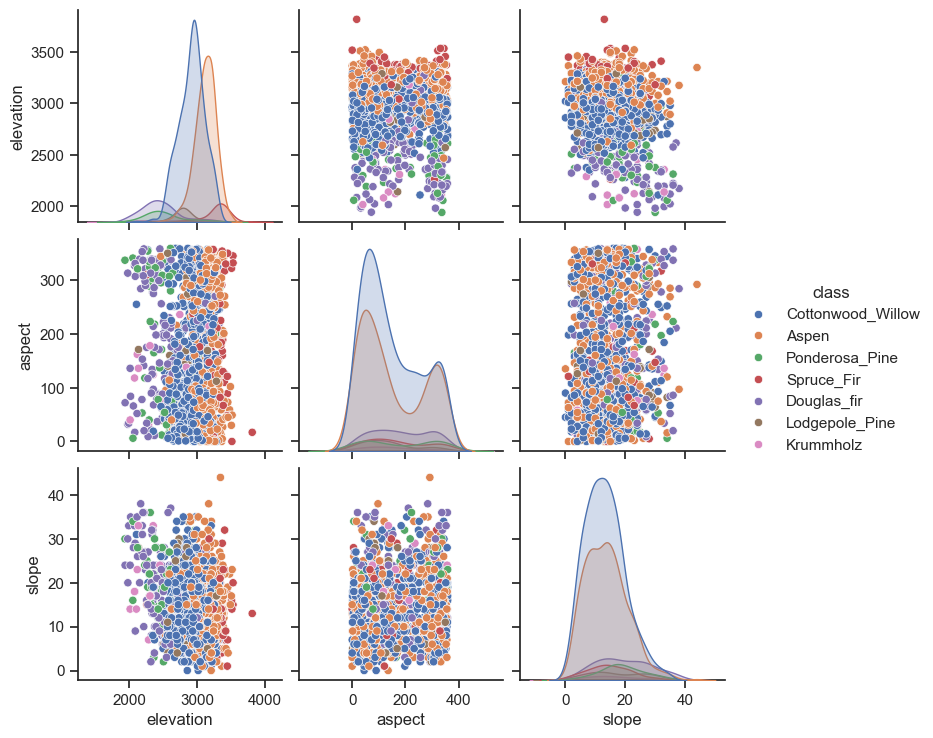

In [23]:
# Using seaborn to build the scatter matrix
# only first 3 columns, first 1000 examples
n_points = 1500
df = pd.DataFrame(X[:n_points,:3], columns=features[:3])
df['class'] = [classes[i] for i in y[:n_points]]
sns.set(style="ticks")
sns.pairplot(df, hue="class");

## Упражнение 1: Случайные леса
Реализуйте функцию `evaluate_RF`, которая измеряет производительность классификатора случайных лесов, используя деревья
(максимальной) глубины 2,8,32,64 для любого количества деревьев в ансамбле (`n_estimators`). 
Для оценки вы должны измерить точность, используя 3-кратную перекрестную проверку. 
Используйте `random_state=1` для обеспечения воспроизводимости. Наконец, постройте график результатов по крайней мере для 5 значений `n_estimators` в диапазоне от 1 до 30. Конечно, вы можете повторно использовать код из предыдущих лабораторных работ и заданий. Интерпретируйте результаты.
Вы можете взять 50%-ную подвыборку, чтобы ускорить построение графика.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# Функция для оценки Random Forest

def evaluate_RF(X, y, n_estimators_list=[1, 5, 10, 15, 20, 25, 30], max_depth_list=[2, 8, 32, 64]):
    np.random.seed(1)
    
    # Опционально: уменьшаем размер выборки на 50% для ускорения
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.5, random_state=1, stratify=y)
    
    results = {depth: [] for depth in max_depth_list}
    
    for depth in max_depth_list:
        for n_estimators in n_estimators_list:
            clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, random_state=1, n_jobs=-1)
            scores = cross_val_score(clf, X_sample, y_sample, cv=3, scoring='accuracy')
            mean_score = scores.mean()
            results[depth].append(mean_score)
            print(f"Depth {depth}, Trees {n_estimators}: Accuracy = {mean_score:.4f}")
    
    # Визуализация результатов
    plt.figure(figsize=(10, 6))
    for depth in max_depth_list:
        plt.plot(n_estimators_list, results[depth], marker='o', label=f'max_depth={depth}')
    
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Accuracy (Cross-Validation)")
    plt.title("Random Forest Accuracy vs. Number of Trees")
    plt.legend()
    plt.grid()
    plt.show()
    
    return results

Depth 2, Trees 1: Accuracy = 0.5136
Depth 2, Trees 5: Accuracy = 0.6075
Depth 2, Trees 10: Accuracy = 0.6061
Depth 2, Trees 15: Accuracy = 0.6057
Depth 2, Trees 20: Accuracy = 0.5986
Depth 2, Trees 25: Accuracy = 0.5974
Depth 2, Trees 30: Accuracy = 0.5541
Depth 8, Trees 1: Accuracy = 0.6058
Depth 8, Trees 5: Accuracy = 0.6894
Depth 8, Trees 10: Accuracy = 0.6930
Depth 8, Trees 15: Accuracy = 0.6917
Depth 8, Trees 20: Accuracy = 0.6974
Depth 8, Trees 25: Accuracy = 0.6969
Depth 8, Trees 30: Accuracy = 0.6983
Depth 32, Trees 1: Accuracy = 0.6977
Depth 32, Trees 5: Accuracy = 0.7855
Depth 32, Trees 10: Accuracy = 0.8102
Depth 32, Trees 15: Accuracy = 0.8170
Depth 32, Trees 20: Accuracy = 0.8186
Depth 32, Trees 25: Accuracy = 0.8223
Depth 32, Trees 30: Accuracy = 0.8236
Depth 64, Trees 1: Accuracy = 0.6932
Depth 64, Trees 5: Accuracy = 0.7866
Depth 64, Trees 10: Accuracy = 0.8083
Depth 64, Trees 15: Accuracy = 0.8176
Depth 64, Trees 20: Accuracy = 0.8221
Depth 64, Trees 25: Accuracy = 0.8

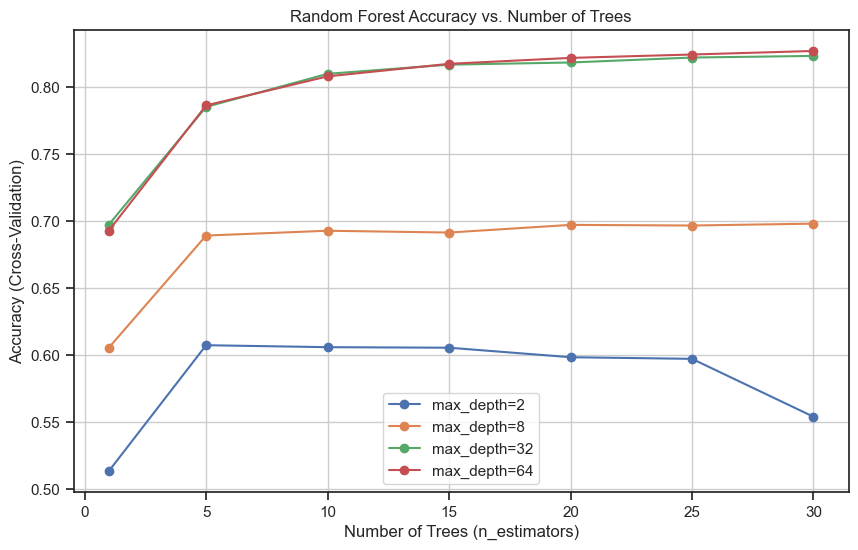

{2: [np.float64(0.5136422860356745),
  np.float64(0.6075440154809582),
  np.float64(0.6060765050338439),
  np.float64(0.6056779198462695),
  np.float64(0.5985759900682295),
  np.float64(0.5973621520441532),
  np.float64(0.5541344718255036)],
 8: [np.float64(0.6057869355326506),
  np.float64(0.6894159234605679),
  np.float64(0.6930212785184261),
  np.float64(0.6916624135019903),
  np.float64(0.6973874647328243),
  np.float64(0.6969163557094826),
  np.float64(0.6983114319305875)],
 32: [np.float64(0.6976774724355805),
  np.float64(0.7854916141878935),
  np.float64(0.8101854135587713),
  np.float64(0.8170337447679694),
  np.float64(0.8186461847199045),
  np.float64(0.8223421017623654),
  np.float64(0.8235559624350617)],
 64: [np.float64(0.6931842678359798),
  np.float64(0.7866148262203972),
  np.float64(0.8082830643763413),
  np.float64(0.8176497084572132),
  np.float64(0.8220703163515731),
  np.float64(0.824606750088782),
  np.float64(0.8272518587983478)]}

In [11]:
evaluate_RF(X, y)

## Упражнение 2: Другие измерения
Повторите тот же график, но теперь используйте balanced_accuracy в качестве критерия оценки. Смотрите в разделе [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score).
Используйте только оптимальную max_depth из предыдущего вопроса. Видите ли вы важное отличие?

In [28]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Функция для оценки Random Forest

def evaluate_RF_balanced(X, y, n_estimators_list=[1, 5, 10, 15, 20, 25, 30], optimal_max_depth=32):
    np.random.seed(1)
    
    # Опционально: уменьшаем размер выборки на 50% для ускорения
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.5, random_state=1, stratify=y)
    
    results = []
    
    for n_estimators in n_estimators_list:
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=optimal_max_depth, random_state=1, n_jobs=-1)
        scores = cross_val_score(clf, X_sample, y_sample, cv=3, scoring=make_scorer(balanced_accuracy_score))
        mean_score = scores.mean()
        results.append(mean_score)
        print(f"Optimal Depth {optimal_max_depth}, Trees {n_estimators}: Balanced Accuracy = {mean_score:.4f}")
    
    # Визуализация результатов
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_list, results, marker='o', label=f'max_depth={optimal_max_depth}')
    
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Balanced Accuracy (Cross-Validation)")
    plt.title("Random Forest Balanced Accuracy vs. Number of Trees")
    plt.legend()
    plt.grid()
    plt.show()
    
    return results


Optimal Depth 32, Trees 1: Balanced Accuracy = 0.5148
Optimal Depth 32, Trees 5: Balanced Accuracy = 0.5666
Optimal Depth 32, Trees 10: Balanced Accuracy = 0.5899
Optimal Depth 32, Trees 15: Balanced Accuracy = 0.5980
Optimal Depth 32, Trees 20: Balanced Accuracy = 0.5979
Optimal Depth 32, Trees 25: Balanced Accuracy = 0.6034
Optimal Depth 32, Trees 30: Balanced Accuracy = 0.6040


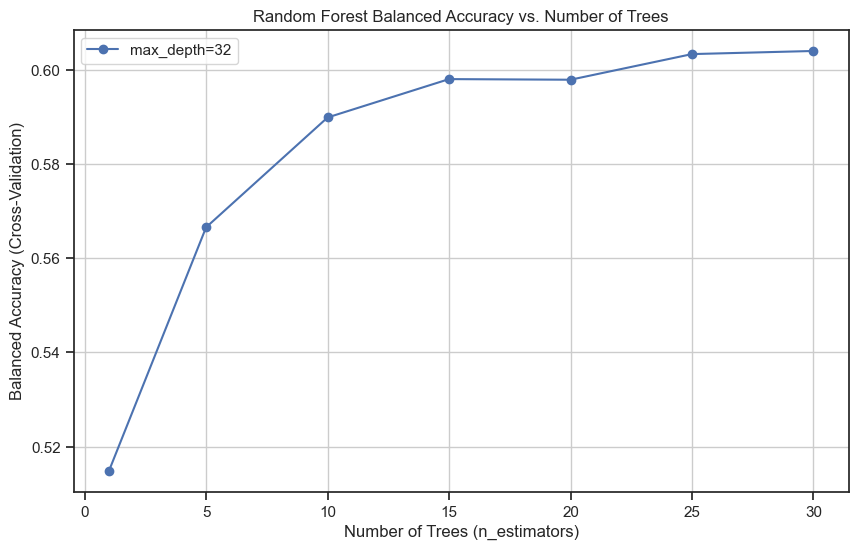

[np.float64(0.5148345423743511),
 np.float64(0.5665788812775304),
 np.float64(0.5899019202305222),
 np.float64(0.5980497536870739),
 np.float64(0.5979174819245597),
 np.float64(0.6033613603879746),
 np.float64(0.604023985306542)]

In [29]:
evaluate_RF_balanced(X, y)

Да, есть важное различие между этими двумя метриками. Balanced Accuracy ниже, чем обычная Accuracy.
Это ожидаемо, так как Balanced Accuracy корректирует смещение в пользу более частых классов.
Обычная точность достигала 82%, а Balanced Accuracy только 60%.

## Упражнение 3: Важность объектов
Извлеките значения объектов в соответствии с (настроенной) моделью случайного леса. Какие объекты являются наиболее важными?

In [61]:
# Функция для получения важности признаков
def get_feature_importance(X, y, feature_names, optimal_max_depth=32, n_estimators=30):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=optimal_max_depth, random_state=1, n_jobs=-1)
    clf.fit(X, y)
    feature_importances = clf.feature_importances_
    
    # Создание DataFrame с важностью признаков
    feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    
    # Визуализация
    plt.figure(figsize=(16, 16))  # Увеличенная ширина графика
    plt.barh(feature_df['Feature'], feature_df['Importance'])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title("Feature Importance in Random Forest")
    plt.gca().invert_yaxis()
    plt.show()
    
    return feature_df

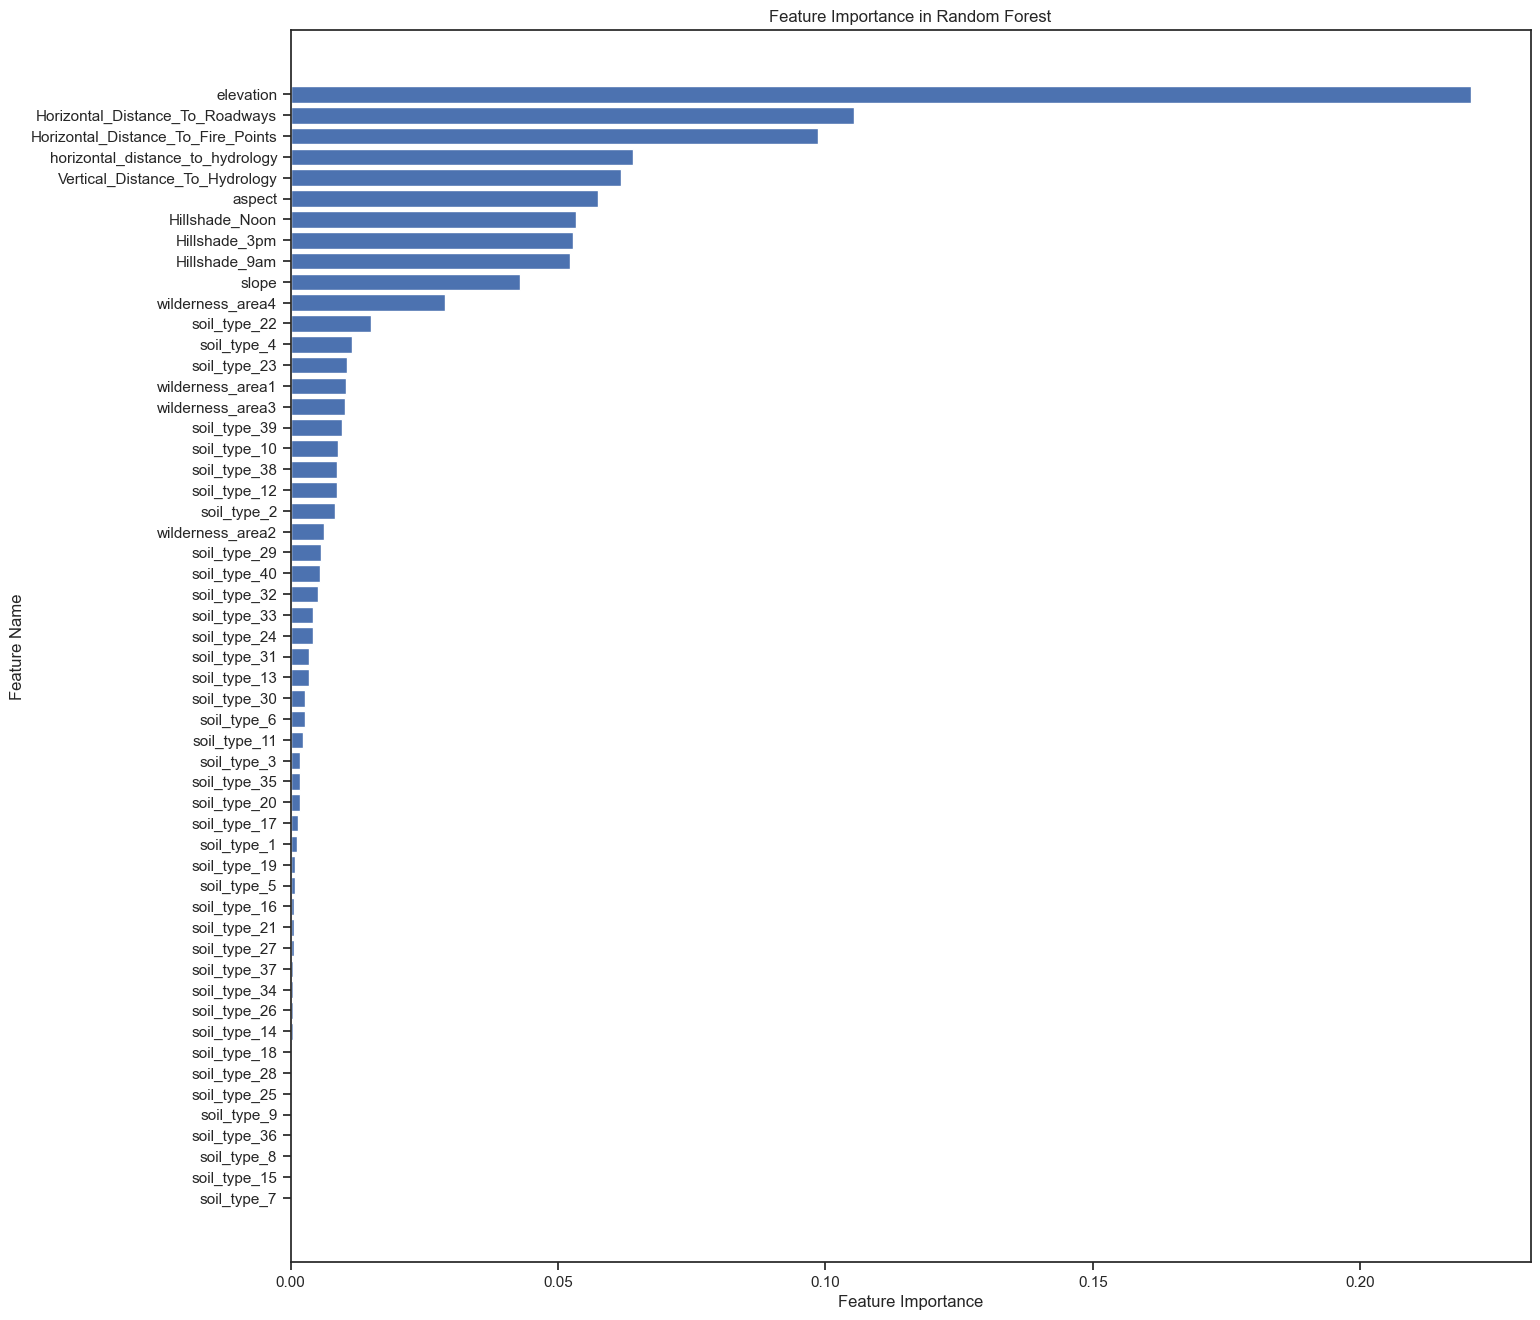

In [77]:
feature_importances = get_feature_importance(X, y, feature_names=features)


## Упражнение 4: Выбор объектов
Перестройте свой настроенный случайный лес, но на этот раз используя только первые 10 объектов.
Верните как сбалансированную точность, так и время тренировки. Интерпретируйте результаты.

In [82]:
import time

# Функция для получения важности признаков без визуализации
def get_feature_importance_no_plot(X, y, feature_names, optimal_max_depth=32, n_estimators=30):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=optimal_max_depth, random_state=1, n_jobs=-1)
    clf.fit(X, y)
    feature_importances = clf.feature_importances_
    
    # Создание DataFrame с важностью признаков
    feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    
    return feature_df

# Функция для обучения Random Forest с топ-10 признаками и измерения времени
def evaluate_RF_top10(X, y, feature_names, optimal_max_depth=32, n_estimators=30):
    # Получаем топ-10 признаков
    top_10_features_df = get_feature_importance_no_plot(X, y, feature_names, optimal_max_depth, n_estimators).head(10)
    top_10_features = top_10_features_df['Feature'].tolist()
    X_top10 = X[:, [feature_names.index(f) for f in top_10_features]]
    
    # Измеряем время обучения
    start_time = time.time()
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=optimal_max_depth, random_state=1, n_jobs=-1)
    scores = cross_val_score(clf, X_top10, y, cv=3, scoring=make_scorer(balanced_accuracy_score))
    mean_score = scores.mean()
    end_time = time.time()
    training_time = end_time - start_time
    
    print(f"Balanced Accuracy (Top 10 Features): {mean_score:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    
    # Визуализация только топ-10 признаков
    plt.figure(figsize=(12, 6))
    plt.barh(top_10_features_df['Feature'], top_10_features_df['Importance'])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title("Top 10 Important Features")
    plt.gca().invert_yaxis()
    plt.show()
    
    return None

Balanced Accuracy (Top 10 Features): 0.6232
Training Time: 3.2016 seconds


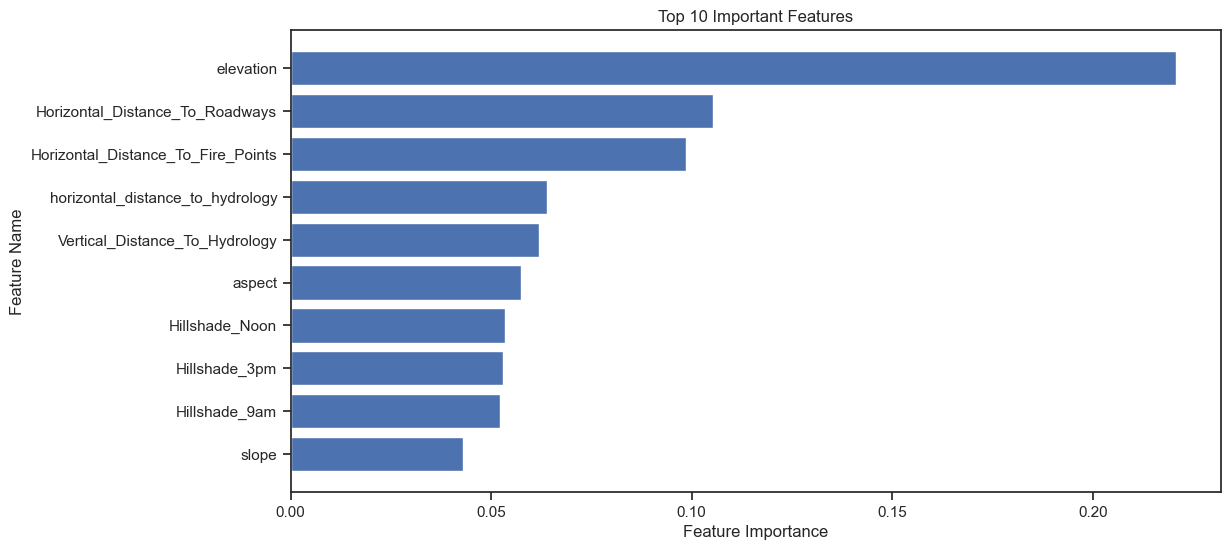

In [83]:
evaluate_RF_top10(X, y, feature_names=features)


## Упражнение 5: Матрица путаницы
Проведите стандартное стратифицированное исследование и сгенерируйте матрицу путаницы для настроенного случайного леса. Какие классы по-прежнему часто путают?

In [91]:
from sklearn.metrics import make_scorer, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Функция для расчета и отображения матрицы ошибок
def plot_confusion_matrix(X, y, optimal_max_depth=32, n_estimators=30, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=1)
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=optimal_max_depth, random_state=1, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix of Random Forest")
    plt.show()
    
    return None

<Figure size 800x600 with 0 Axes>

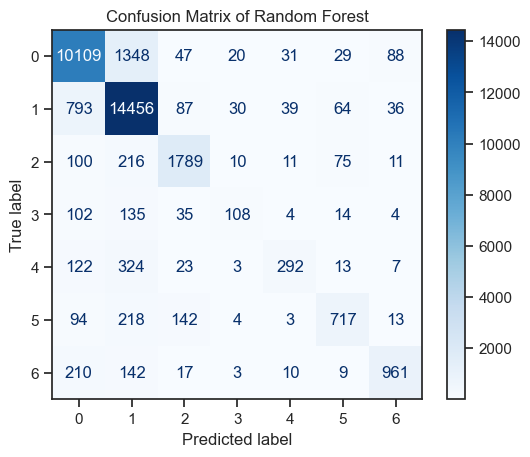

In [92]:
plot_confusion_matrix(X, y)


Основная путаница между классами 0 и 1.  
Классы 4, 5, 6 часто предсказываются как класс 1.

## Упражнение 6: Модель второго уровня
Постройте бинарную модель специально для правильного выбора между первым и вторым классами.
Выберите только точки данных с этими классами и обучите новый случайный лес. Выполните стандартное стратифицированное разбиение и постройте результирующую ROC-кривую. Можем ли мы все еще улучшить модель, откалибровав пороговое значение?

In [98]:
from sklearn.metrics import make_scorer, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Функция для бинарной классификации между классами 0 и 1 и построения ROC-кривой
def binary_roc_curve(X, y, optimal_max_depth=32, n_estimators=30, test_size=0.3):
    # Выбираем только классы 0 и 1
    binary_mask = (y == 0) | (y == 1)
    X_binary = X[binary_mask]
    y_binary = y[binary_mask]
    
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=test_size, stratify=y_binary, random_state=1)
    
    # Обучение модели
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=optimal_max_depth, random_state=1, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_probs = clf.predict_proba(X_test)[:, 1]  # Вероятности для класса 1
    
    # ROC-кривая
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Binary Classification (Class 0 vs 1)")
    plt.legend()
    plt.show()
    
    return None


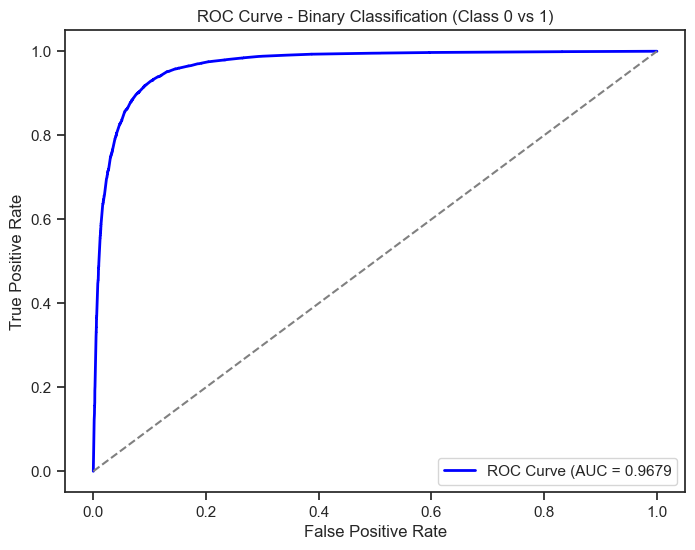

In [99]:
binary_roc_curve(X, y)


Да, настройка порога вероятностей может улучшить модель в зависимости от того, что важнее: снизить ложно-положительные ошибки (False Positives, FP) или ложно-отрицательные ошибки (False Negatives, FN).

## Упражнение 7: Калибровка модели
Для обученной модели бинарного случайного леса постройте калибровочную кривую (см. [курс notebook](https://ml-course.github.io/engineer/slides_html/03%20-%20Model%20Selection.slides.html#/40)). 
Далее попробуйте скорректировать ее с помощью шкалы Платта (или сигмовидной шкалы).

Вероятностная калибровка должна выполняться на основе новых данных, которые не использовались для подгонки модели. В классе [CalibratedClassifierCV](https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py) используется генератор перекрестной проверки и оценки для каждого разделения параметров модели на выборках поезда и калибровки тестовых образцов. Затем вероятности, предсказанные для сгибов, усредняются. Уже установленные классификаторы могут быть откалиброваны с помощью CalibratedClassifierCV с помощью параметра cv=”prefit”. [Читать далее](https://scikit-learn.org/stable/modules/calibration.html)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt

# Функция для построения калибровочной кривой и применения Platt Scaling
def plot_calibration_curve(X, y, optimal_max_depth=32, n_estimators=30, test_size=0.3, method='sigmoid'):
    # Фильтруем только классы 0 и 1
    binary_mask = (y == 0) | (y == 1)
    X_binary = X[binary_mask]
    y_binary = y[binary_mask]
    
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=test_size, stratify=y_binary, random_state=1)
    
    # Обучение модели
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=optimal_max_depth, random_state=1, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    # Калибровка модели
    calibrated_clf = CalibratedClassifierCV(clf, method=method, cv='prefit')
    calibrated_clf.fit(X_test, y_test)  # Используем новые данные для калибровки
    
    # Получение вероятностей до и после калибровки
    prob_uncalibrated = clf.predict_proba(X_test)[:, 1]
    prob_calibrated = calibrated_clf.predict_proba(X_test)[:, 1]
    
    # Построение калибровочной кривой
    plt.figure(figsize=(8, 6))
    for probs, label in zip([prob_uncalibrated, prob_calibrated], ["Uncalibrated", "Calibrated"]):
        fraction_of_positives, mean_predicted_value = calibration_curve(y_test, probs, n_bins=10)
        plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=label)
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve - Platt Scaling")
    plt.legend()
    plt.show()
    
    return None


c:\Users\MTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


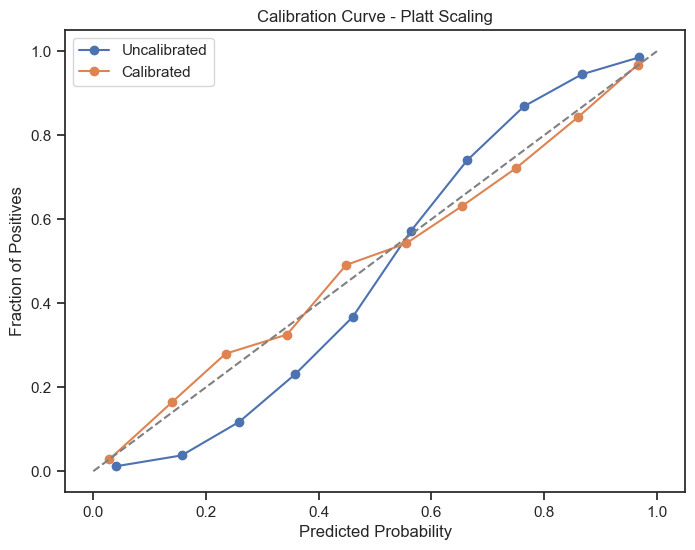

In [106]:
plot_calibration_curve(X, y)


## Упражнение 8: Повышение градиента
Реализуйте функцию "evaluate_GB", которая измеряет производительность "GradientBoostingClassifier" или "XGBoostClassifier" для
разных скоростей обучения (0,01, 0,1, 1 и 10). Как и прежде, используйте 3-кратную перекрестную проверку. Вы можете использовать 5%-ную стратифицированную выборку из всего набора данных.
Наконец, постройте график результатов для `n_estimators` в диапазоне от 1 до 100. Запустите все классификаторы GB с `random_state=1`, чтобы обеспечить воспроизводимость.

In [111]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Функция для оценки Gradient Boosting
def evaluate_GB(X, y, model_type='gb', learning_rates=[0.01, 0.1, 1, 10], n_estimators_range=range(1, 11)):
    np.random.seed(1)
    
    # Берем 5% стратифицированной выборки
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.01, stratify=y, random_state=1)
    
    results = {lr: [] for lr in learning_rates}
    
    for lr in learning_rates:
        for n_estimators in n_estimators_range:
            if model_type == 'gb':
                clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr, random_state=1)
            elif model_type == 'xgb':
                clf = XGBClassifier(n_estimators=n_estimators, learning_rate=lr, eval_metric='logloss', random_state=1)
            
            scores = cross_val_score(clf, X_sample, y_sample, cv=3, scoring='accuracy')
            mean_score = scores.mean()
            results[lr].append(mean_score)
            print(f"Learning Rate {lr}, Trees {n_estimators}: Accuracy = {mean_score:.4f}")
    
    # Визуализация результатов
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        plt.plot(n_estimators_range, results[lr], marker='o', label=f'LR={lr}')
    
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Accuracy (Cross-Validation)")
    plt.title(f"{model_type.upper()} Accuracy vs. Number of Trees")
    plt.legend()
    plt.grid()
    plt.show()
    
    return results


Learning Rate 0.01, Trees 1: Accuracy = 0.4678
Learning Rate 0.01, Trees 2: Accuracy = 0.4678
Learning Rate 0.01, Trees 3: Accuracy = 0.4678
Learning Rate 0.01, Trees 4: Accuracy = 0.4678
Learning Rate 0.01, Trees 5: Accuracy = 0.4678
Learning Rate 0.01, Trees 6: Accuracy = 0.4678
Learning Rate 0.01, Trees 7: Accuracy = 0.4678
Learning Rate 0.01, Trees 8: Accuracy = 0.4678
Learning Rate 0.01, Trees 9: Accuracy = 0.4678
Learning Rate 0.1, Trees 1: Accuracy = 0.4823
Learning Rate 0.1, Trees 2: Accuracy = 0.5721
Learning Rate 0.1, Trees 3: Accuracy = 0.6029
Learning Rate 0.1, Trees 4: Accuracy = 0.6165
Learning Rate 0.1, Trees 5: Accuracy = 0.6365
Learning Rate 0.1, Trees 6: Accuracy = 0.6356
Learning Rate 0.1, Trees 7: Accuracy = 0.6392
Learning Rate 0.1, Trees 8: Accuracy = 0.6401
Learning Rate 0.1, Trees 9: Accuracy = 0.6410
Learning Rate 1, Trees 1: Accuracy = 0.6102
Learning Rate 1, Trees 2: Accuracy = 0.6002
Learning Rate 1, Trees 3: Accuracy = 0.5866
Learning Rate 1, Trees 4: Accur

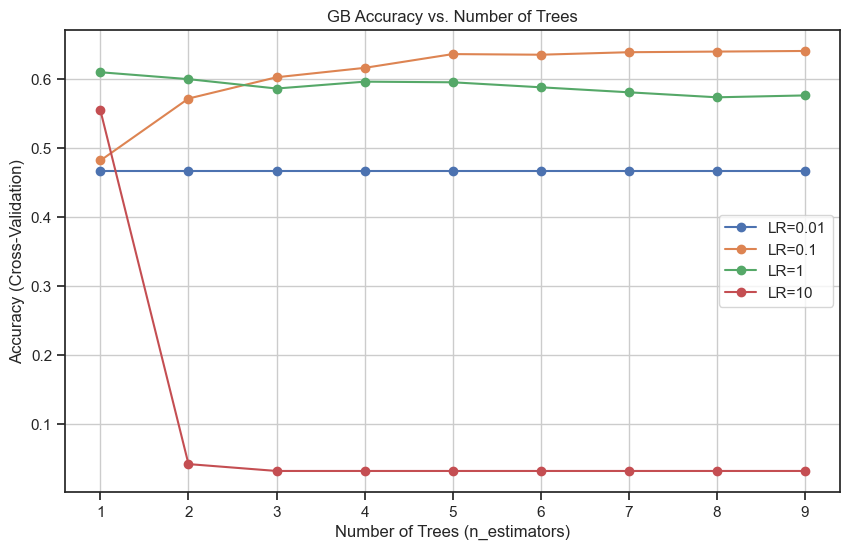

Learning Rate 0.01, Trees 1: Accuracy = 0.6392
Learning Rate 0.01, Trees 2: Accuracy = 0.6437
Learning Rate 0.01, Trees 3: Accuracy = 0.6455
Learning Rate 0.01, Trees 4: Accuracy = 0.6464
Learning Rate 0.01, Trees 5: Accuracy = 0.6455
Learning Rate 0.01, Trees 6: Accuracy = 0.6437
Learning Rate 0.01, Trees 7: Accuracy = 0.6473
Learning Rate 0.01, Trees 8: Accuracy = 0.6464
Learning Rate 0.01, Trees 9: Accuracy = 0.6428
Learning Rate 0.1, Trees 1: Accuracy = 0.6392
Learning Rate 0.1, Trees 2: Accuracy = 0.6437
Learning Rate 0.1, Trees 3: Accuracy = 0.6419
Learning Rate 0.1, Trees 4: Accuracy = 0.6446
Learning Rate 0.1, Trees 5: Accuracy = 0.6428
Learning Rate 0.1, Trees 6: Accuracy = 0.6510
Learning Rate 0.1, Trees 7: Accuracy = 0.6473
Learning Rate 0.1, Trees 8: Accuracy = 0.6464
Learning Rate 0.1, Trees 9: Accuracy = 0.6482
Learning Rate 1, Trees 1: Accuracy = 0.6392
Learning Rate 1, Trees 2: Accuracy = 0.6437
Learning Rate 1, Trees 3: Accuracy = 0.6428
Learning Rate 1, Trees 4: Accur

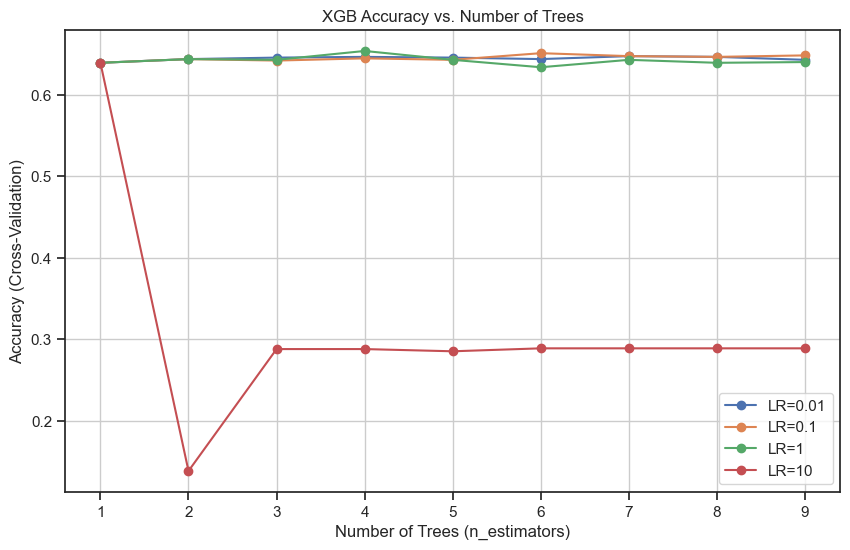

{0.01: [np.float64(0.639174367176085),
  np.float64(0.6437156932432967),
  np.float64(0.6455297555581883),
  np.float64(0.6464330845476445),
  np.float64(0.6455272874461951),
  np.float64(0.6437181613552897),
  np.float64(0.6473438178730798),
  np.float64(0.6464355526596375),
  np.float64(0.6428123642538405)],
 0.1: [np.float64(0.639174367176085),
  np.float64(0.6437058207953245),
  np.float64(0.641899162816412),
  np.float64(0.6446190222327528),
  np.float64(0.6428049599178612),
  np.float64(0.6509596019428978),
  np.float64(0.6473413497610868),
  np.float64(0.6464330845476445),
  np.float64(0.6482422106385499)],
 1: [np.float64(0.639174367176085),
  np.float64(0.6437033526833313),
  np.float64(0.6427975555818821),
  np.float64(0.6536720570232594),
  np.float64(0.6427975555818821),
  np.float64(0.6337297121194171),
  np.float64(0.642795087469889),
  np.float64(0.6391620266161198),
  np.float64(0.640070291829562)],
 10: [np.float64(0.639174367176085),
  np.float64(0.13871036212139162),

In [166]:
res = evaluate_GB(X, y, model_type='gb')  # Для Gradient Boosting
evaluate_GB(X, y, model_type='xgb') # Для XGBoost


Реализуйте функцию, которая отображает оценку `evaluate_GB` для `n_estimators` = 10,20,30,...,100 по линейной шкале.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_evaluate_GB(results, n_estimators_range=range(10, 101, 10)):
    plt.figure(figsize=(10, 6))
    
    for lr, scores in results.items():
        if len(scores) != len(n_estimators_range):
            print(f"Warning: Mismatch in length for LR={lr}. Expected {len(n_estimators_range)}, got {len(scores)}.")
            continue  # Skip mismatched data
        
        plt.plot(n_estimators_range, scores, marker='o', label=f'LR={lr}')
    
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Accuracy (Cross-Validation)")
    plt.title("Gradient Boosting Accuracy vs. Number of Trees")
    plt.legend()
    plt.grid()
    plt.show()

Learning Rate 0.01, Trees 10: Accuracy = 0.4678
Learning Rate 0.01, Trees 20: Accuracy = 0.5594
Learning Rate 0.01, Trees 30: Accuracy = 0.5993
Learning Rate 0.01, Trees 40: Accuracy = 0.6147
Learning Rate 0.01, Trees 50: Accuracy = 0.6328
Learning Rate 0.01, Trees 60: Accuracy = 0.6437
Learning Rate 0.01, Trees 70: Accuracy = 0.6446
Learning Rate 0.01, Trees 80: Accuracy = 0.6455
Learning Rate 0.01, Trees 90: Accuracy = 0.6464
Learning Rate 0.01, Trees 100: Accuracy = 0.6500
Learning Rate 0.1, Trees 10: Accuracy = 0.6500
Learning Rate 0.1, Trees 20: Accuracy = 0.6682
Learning Rate 0.1, Trees 30: Accuracy = 0.6682
Learning Rate 0.1, Trees 40: Accuracy = 0.6709
Learning Rate 0.1, Trees 50: Accuracy = 0.6727
Learning Rate 0.1, Trees 60: Accuracy = 0.6655
Learning Rate 0.1, Trees 70: Accuracy = 0.6609
Learning Rate 0.1, Trees 80: Accuracy = 0.6636
Learning Rate 0.1, Trees 90: Accuracy = 0.6682
Learning Rate 0.1, Trees 100: Accuracy = 0.6691
Learning Rate 1, Trees 10: Accuracy = 0.5702
Lea

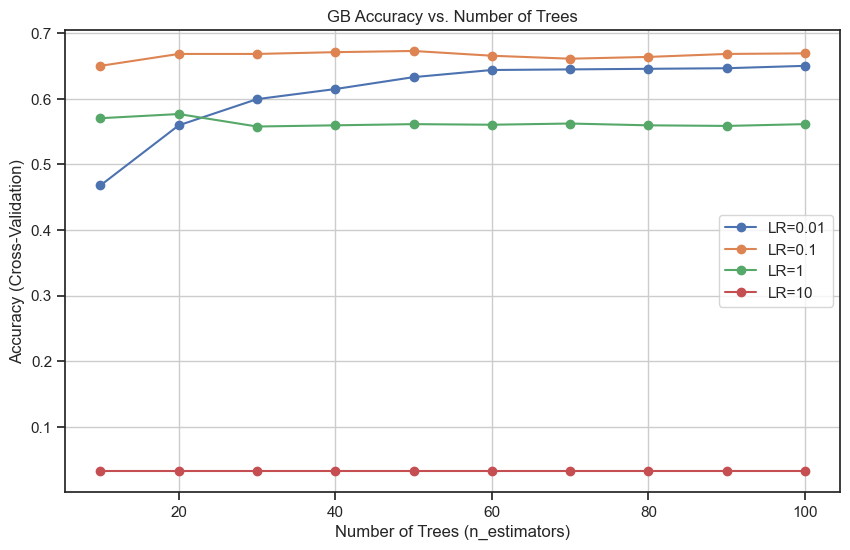

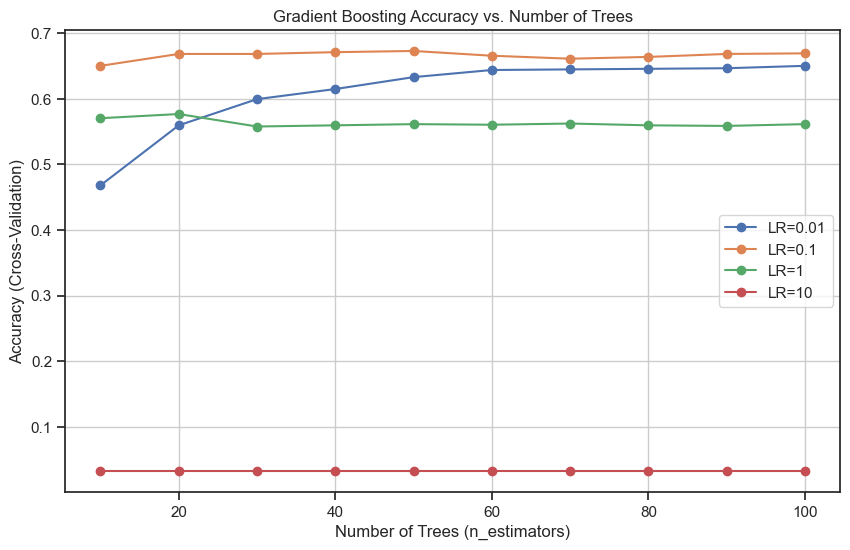

In [173]:
results = evaluate_GB(X, y, model_type='gb', n_estimators_range=range(10, 101, 10))
plot_evaluate_GB(results, n_estimators_range=range(10, 101, 10))